In [4]:
#이미지 주소 복사해서 파일로 저장하기
import requests

url = 'http://blogfiles.naver.net/MjAxOTA4MDJfMjYy/MDAxNTY0NzA5NDcyMzU3.HM3XLsuxRLoyzOYgKfttAMBUMmBbARj5qbHdbnY6vKIg.qbsKpr-r3hrB4Eax7Jpj_RVUPtRXukSGyvjHMtOMaucg.JPEG.rlatnsrl0223/20190729152222.jpg'
res = requests.get(url)

# 200 ok
print(res.status_code)

# 파일로 저장하기
with open('서른.jpg', 'wb') as f:
    f.write(res.content)

200


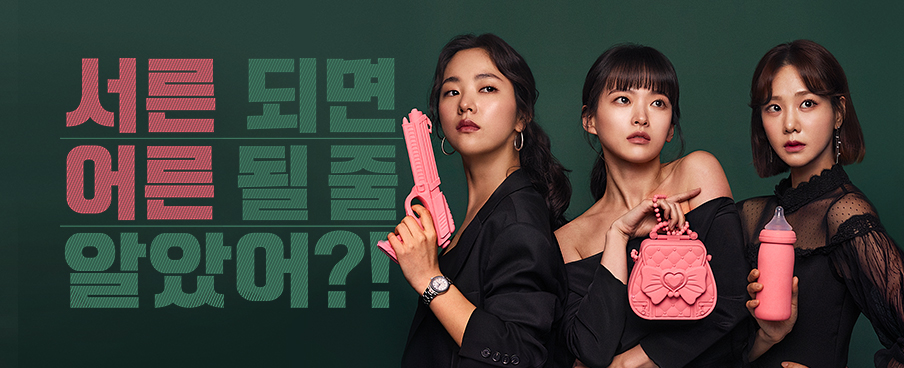

In [5]:
# Image 파일 불러오기
from IPython.display import Image
Image(filename = '서른.jpg', width = 200)

In [13]:
# requests 라이브러리의 json 기능
import requests
res = requests.get('https://api.github.com/')

# import json
# github = json.loads(res.content)
github = res.json()
print(github['current_user_url'])

# json 파일 저장하기
with open('github.json','w',encoding="utf8") as f:
    f.write(json.dumps(github))

https://api.github.com/user


In [17]:
# requests 라이브러리의 get, post 기능
import requests

res = requests.get('http://localhost:5000/requests')
print(res.text)

print("*" * 50)

res = requests.post('http://localhost:5000/requests', data={'url':'http://info.cern.ch'})
print(res.text)

<h1>link 추출기</h1>
<form action="/requests" method="post">
    <p><input type="text" name="url" placeholder="url"></p>
    <p><input type="submit"></p>
</form>

<hr>

<ol>
    
</ol>
**************************************************
<h1>link 추출기</h1>
<form action="/requests" method="post">
    <p><input type="text" name="url" placeholder="url"></p>
    <p><input type="submit"></p>
</form>

<hr>

<ol>
    
    <li>http://info.cern.ch/hypertext/WWW/TheProject.html</li>
    
    <li>http://line-mode.cern.ch/www/hypertext/WWW/TheProject.html</li>
    
    <li>http://home.web.cern.ch/topics/birth-web</li>
    
    <li>http://home.web.cern.ch/about</li>
    
</ol>


In [6]:
# BeautifulSoup
# 미션1. requests로 받아온 HTML에서 a 태그의 href 링크 추출하기
import requests
from bs4 import BeautifulSoup

res = requests.get('http://info.cern.ch')
soup = BeautifulSoup(res.content, 'html.parser')

print(type(soup))
print(type(soup.a))

# a 태그 추출하기
print(soup.a)

# a 태그의 text 부분 추출하기
print(soup.a.get_text())

# attribute 추출하기(dictionary로 생각하면 됨)
print(soup.a['href'])

<class 'bs4.BeautifulSoup'>
<class 'bs4.element.Tag'>
<a href="http://info.cern.ch/hypertext/WWW/TheProject.html">Browse the first website</a>
Browse the first website
http://info.cern.ch/hypertext/WWW/TheProject.html


In [12]:
# css select - 링크 추출하기
soup.select('a')

links = [tag['href'] for tag in soup.select('a')]
links

['http://info.cern.ch/hypertext/WWW/TheProject.html',
 'http://line-mode.cern.ch/www/hypertext/WWW/TheProject.html',
 'http://home.web.cern.ch/topics/birth-web',
 'http://home.web.cern.ch/about']

In [11]:
# css select - text 추출하기
texts = [tag.get_text() for tag in soup.select('a')]
texts

['Browse the first website',
 'Browse the first website using the line-mode browser simulator',
 'Learn about the birth of the web',
 'Learn about CERN, the physics laboratory where the web was born']

In [14]:
# get_links 함수 만들기

from bs4 import BeautifulSoup

def get_links(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    return [title.get('href') for title in soup.select('a')]

link = 'http://info.cern.ch/'
get_links(link)

['http://info.cern.ch/hypertext/WWW/TheProject.html',
 'http://line-mode.cern.ch/www/hypertext/WWW/TheProject.html',
 'http://home.web.cern.ch/topics/birth-web',
 'http://home.web.cern.ch/about']

In [5]:
# 다음 영화 순위 크롤링하기★
import requests
from bs4 import BeautifulSoup

page = requests.get('https://movie.daum.net/boxoffice/weekly')
soup = BeautifulSoup(page.text, 'html.parser')

soup.select("desc_boxthumb")

#print(soup)

[]

In [12]:
#날짜와 시간
import datetime

today = datetime.date.today()
now = datetime.datetime.now()
yesterday = datetime.date(2020, 5, 17)

from datetime import date, datetime # 위와 똑같은 코드
today = date.today()
now = datetime.now()
yesterday = date(2020, 5, 17)


print(today)
print(now)
print(yesterday)

2020-05-18
2020-05-18 01:34:24.782140
2020-05-17


In [15]:
# 시간의 변화와 형식
from datetime import date, datetime, timedelta

prev_28 = date.today() - timedelta(days=7*4)
print(prev_28.strftime('%Y%m%d'))

20200420


In [16]:
# 함수에 여러개의 값 한꺼번에 입력하기
email = "{0}님 안녕하세요. 오늘은 {1}일째 수업이네요."
print(email.format('이숙번', 6))

email = "{0}님 안녕하세요. 오늘은 {1}일째 수업이네요."
data = ['이숙번', 6]
print(email.format(*data)) # list는 *

email = "{name}님 안녕하세요. 오늘은 {day}일째 수업이네요."
print(email.format(name ='이숙번', day=6))

email = "{name}님 안녕하세요. 오늘은 {day}일째 수업이네요."
data = {'name': '이숙번','day': 6}
print(email.format(**data)) # dict는 **

이숙번님 안녕하세요. 오늘은 6일째 수업이네요.
이숙번님 안녕하세요. 오늘은 6일째 수업이네요.
이숙번님 안녕하세요. 오늘은 6일째 수업이네요.
이숙번님 안녕하세요. 오늘은 6일째 수업이네요.


In [17]:
d = dict(key=1, ccc=2, ddd=3)
print(d)

{'key': 1, 'ccc': 2, 'ddd': 3}


In [18]:
def mean(*args):
    return sum(args) / len(args)

print(mean(1,2,3,4))
m = [1, 2, 3, 4, 5, 6]
print(mean(*m))

2.5
3.5


In [19]:
d1 = dict(a=1, b=2, c=3)
print(d1)
d2 = dict(d=3, e=4, **d1)
print(d2)

{'a': 1, 'b': 2, 'c': 3}
{'d': 3, 'e': 4, 'a': 1, 'b': 2, 'c': 3}


In [20]:
students = [
    {'name': 'sookbun', 'points': [100, 20]},
    {'name': 'duru', 'points': [120, 200]},
    {'name': 'egoing', 'points': [100, 35]},    
]

students = [dict(sum=sum(s['points']), **s) for s in students]

import pprint
pprint.pprint(students)

[{'name': 'sookbun', 'points': [100, 20], 'sum': 120},
 {'name': 'duru', 'points': [120, 200], 'sum': 320},
 {'name': 'egoing', 'points': [100, 35], 'sum': 135}]
